In [24]:
import numpy as np
import matplotlib.pyplot as plt
import time, sys
sys.path.append('/Users/AbSir/Library/CloudStorage/GoogleDrive-asharda@vols.utk.edu/My Drive/xem2')
from common_functions import jra_nprat
import warnings
from scipy.integrate import simps
from scipy.integrate import quad
from summary_dictionary import ryan_data, nadia_data
from scipy.interpolate import interp1d
import scipy.constants as const
from scipy.constants import physical_constants

target = 'li7'
mp = physical_constants['proton mass energy equivalent in MeV'][0] / 1000 # Proton mass in GeV

# Reading the 1 body density file

['.05', '.0695', '.00782', '.0609', '.00679']
['.15', '.0705', '.00296', '.0619', '.00258']
['.25', '.068', '.001755', '.0609', '.001559']
['.35', '.069', '.001264', '.0627', '.001138']
['.45', '.0684', '9.74E-4', '.0634', '8.93E-4']
['.55', '.0663', '7.83E-4', '.0631', '7.36E-4']
['.65', '.0636', '6.47E-4', '.0619', '6.22E-4']
['.75', '.063', '5.57E-4', '.0626', '5.47E-4']
['.85', '.0616', '4.81E-4', '.0628', '4.84E-4']
['.95', '.0602', '4.24E-4', '.0627', '4.36E-4']
['1.05', '.0571', '3.73E-4', '.061', '3.9E-4']
['1.15', '.0544', '3.31E-4', '.0593', '3.53E-4']
['1.25', '.0514', '2.94E-4', '.0573', '3.21E-4']
['1.35', '.0483', '2.63E-4', '.0552', '2.93E-4']
['1.45', '.0454', '2.36E-4', '.0527', '2.67E-4']
['1.55', '.0423', '2.128E-4', '.0504', '2.46E-4']
['1.65', '.0395', '1.915E-4', '.0479', '2.24E-4']
['1.75', '.0364', '1.728E-4', '.0449', '2.06E-4']
['1.85', '.0331', '1.544E-4', '.0417', '1.872E-4']
['1.95', '.0301', '1.397E-4', '.0385', '1.719E-4']
['2.05', '.02676', '1.246E-4', '

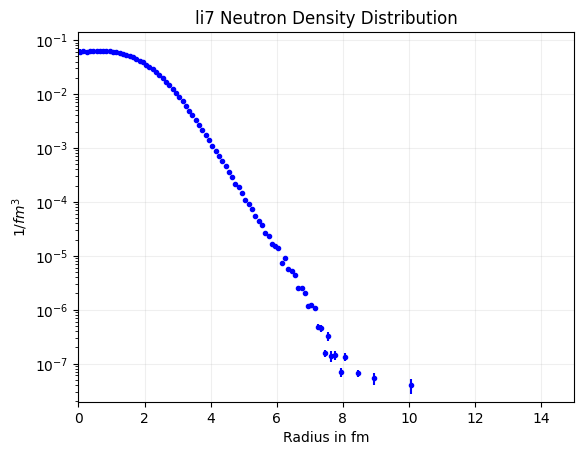

In [25]:
file_path = f'/Users/AbSir/Desktop/FlavaFlav/density/{target}.density'
R_list = []
RHORP_list = []
DRHORP_list = []
RHORN_list = []
DRHORN_list = []
warnings.filterwarnings('ignore')

def process_data(file_path):
    # Flag to indicate parsing should start
    start_parsing = False
    
    # Open the file for reading
    with open(file_path, 'r') as file:
        for line in file:
            # Check if the current line is the delimiter
            if '*****' in line:
                start_parsing = True
                continue  # Skip the delimiter line
            
            # Start processing lines after the delimiter
            if start_parsing:
                # Split the line into columns based on whitespace
                columns = line.split()
                
                # Check if the line has the expected 3 columns
                if len(columns) == 5:
                    # Convert R and RHORP to float, and DRHORP to float (handling scientific notation)
                    try:
                        R, RHORP, DRHORP, RHORN, DRHORN = float(columns[0]), float(columns[1]), float(columns[2]), float(columns[3]), float(columns[4])
                        R_list.append(R)
                        RHORP_list.append(RHORP)
                        DRHORP_list.append(DRHORP)
                        RHORN_list.append(RHORN)
                        DRHORN_list.append(DRHORN)
                        print(columns)
                    except:
                        start_parsing = False
                        break

    # Return the processed data
    # return R_array, RHORP_array, DRHORP_array, RHORN_array, DRHORN_array
    return R_list, RHORP_list, DRHORP_list, RHORN_list, DRHORN_list

R, RHORP, DHORP, RHORN, DRHORN = process_data(file_path)

fig, ax = plt.subplots()

# Plot the data
ax.errorbar(R, RHORN, marker = 'o', yerr = DHORP, color = 'b', markersize = 3, linestyle = 'None')
ax.set_xlabel('Radius in fm')
ax.set_ylabel(r'$1/fm^3$')
ax.set_yscale('log')
ax.set_xlim(0, 15)
ax.set_title(f'{target} Neutron Density Distribution')
ax.grid(alpha = 0.2)
# fig.savefig(f'plots/{target}_density_{time.time():.0f}.pdf')

# Reading the 2 body density file

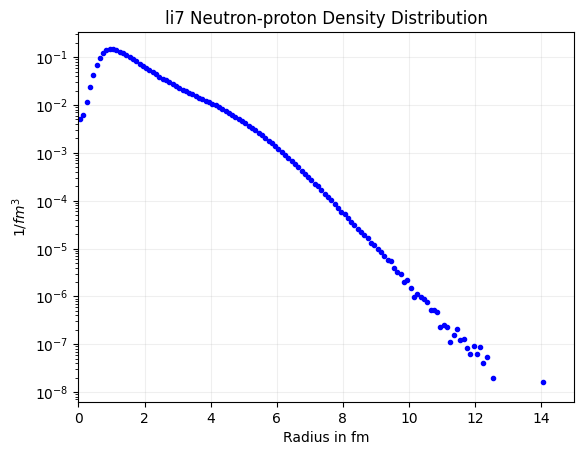

In [26]:
file_path = f'/Users/AbSir/Desktop/FlavaFlav/density2/{target}.density2'
RHORPP_list = []
RHORNP_list = []
RHORNN_list = []
R_list = []

def process_tbd(file_path):
    # Flag to indicate parsing should start
    start_parsing = False
    
    # Open the file for reading
    with open(file_path, 'r') as file:
        for line in file:
            # Check if the current line is the delimiter
            if '*****' in line:
                start_parsing = True
                continue  # Skip the delimiter line
            
            # Start processing lines after the delimiter
            if start_parsing:
                # Split the line into columns based on whitespace
                columns = line.split()
                
                # Check if the line has the expected number of columns
                if len(columns) == 7:
                    # Convert R and RHORP to float, and DRHORP to float (handling scientific notation)
                    try:
                        R, RHORPP, DRHORPP, RHORNP, DRHORNP, RHORNN, DRHORNN = float(columns[0]), float(columns[1]), float(columns[2]), float(columns[3]), float(columns[4]), float(columns[5]), float(columns[6])
                        R_list.append(R)
                        RHORPP_list.append(RHORPP)
                        RHORNP_list.append(RHORNP)
                        RHORNN_list.append(RHORNN)
                    except:
                        start_parsing = False
                        break

    # Return the processed data
    return R_list, RHORPP_list, RHORNP_list, RHORNN_list

R, RHORPP, RHORNP, RHORNN = process_tbd(file_path)

tbd_r = np.array(R)
rhorpp_values = np.array(RHORPP)
rhorpn_values = np.array(RHORNP)
rhornn_values = np.array(RHORNN)

fig, ax = plt.subplots()
# Plot the data
ax.errorbar(R, RHORNP, marker = 'o', color = 'b', markersize = 3, linestyle = 'None')
ax.set_xlabel('Radius in fm')
ax.set_ylabel(r'$1/fm^3$')
ax.set_yscale('log')
ax.set_xlim(0, 15)
ax.set_title(f'{target} Neutron-proton Density Distribution')
ax.grid(alpha = 0.2)
# fig.savefig(f'plots/{target}_2bodydensity_{time.time():.0f}.pdf')

# Reading the momentum file

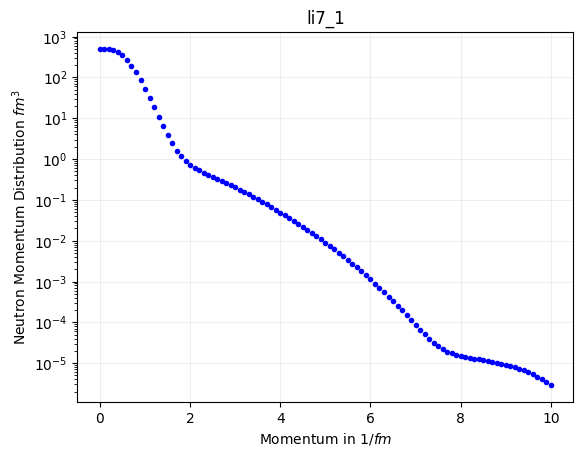

In [27]:
file_path = f'/Users/AbSir/Desktop/FlavaFlav/momentum/{target}_1.momentum'
K_list = []
RHOKN1_list = []
RHOKP1_list = []

def process_mom(file_path):
    # Flag to indicate parsing should start
    start_parsing = False
    
    # Open the file for reading
    with open(file_path, 'r') as file:
        for line in file:
            # Check if the current line is the delimiter
            if '*****' in line:
                start_parsing = True
                continue  # Skip the delimiter line
            
            # Start processing lines after the delimiter
            if start_parsing:
                # Split the line into columns based on whitespace
                columns = line.split()
                
                # Check if the line has the expected number of columns
                if len(columns) == 5:
                    # Convert R and RHORP to float, and DRHORP to float (handling scientific notation)
                    try:
                        K, RHOKN1, DRHOKN1, RHOKP1, DRHOKP1 = float(columns[0]), float(columns[1]), float(columns[2]), float(columns[3]), float(columns[4])
                        K_list.append(K)
                        RHOKN1_list.append(RHOKN1)
                        RHOKP1_list.append(RHOKP1)
                    except:
                        start_parsing = False
                        break

    # Return the processed data
    return K_list, RHOKN1_list, RHOKP1_list

K, RHOKN1, RHOKP1 = process_mom(file_path)

momentum = np.array(K)
rhokn1_values = np.array(RHOKN1)
rhokp1_values = np.array(RHOKP1)

fig, ax = plt.subplots()
# Plot the data
ax.errorbar(K, RHOKN1, marker = 'o', color = 'b', markersize = 3, linestyle = 'None')
ax.set_xlabel(r'Momentum in $1/fm$')
ax.set_ylabel(r'Neutron Momentum Distribution $fm^3$')
ax.set_yscale('log')
ax.set_title(f'{target}_1')
ax.grid(alpha = 0.2)
# fig.savefig(f'plots/{target}_2bodydensity_{time.time():.0f}.pdf')

<h1 style="color:lightblue; text-align:center">Calculating average proton density (fig1)</h1>

\begin{equation}
    \langle\rho\rangle_p = \frac{\int \rho_p^2(r) r^2 dr}{\int \rho_p(r) r^2 dr}
\end{equation}

\begin{equation}
    \text{RMS Radii} = \sqrt{\frac{4 \pi \int \rho(r) r^4 \, dr}{N}}
\end{equation}

\begin{equation}
    N = 4 \pi \int \rho(r) r^2 \, dr
\end{equation}

In [28]:
# Convert lists to numpy arrays
r_values = np.array(R)
rhorp_values = np.array(RHORP)
rhorn_values = np.array(RHORN)

# Calculate the squared values for the numerator
rhorp_squared = rhorp_values**2
rhorn_squared = rhorn_values**2

# Compute the integrals. The first argument is the function to integrate, the second argument is the integration variable in the form of an array
numerator = simps(rhorp_squared * r_values**2, r_values)
denominator = simps(rhorp_values * r_values**2, r_values)
rms = simps(rhorp_values * r_values**4, r_values)
normalization = 4 * np.pi * denominator
rms_radii = np.sqrt((4 * np.pi * rms) / normalization)

# Calculate the expectation value
expectation_value = numerator / denominator

print(f"The normalization constant is: {normalization:.5f}")
print(f"The RMS radius is: {rms_radii:.4f} fm")
print(f"The expectation value of the proton density for {target} is: {expectation_value:.4f} fm^3")

The normalization constant is: 2.99957
The RMS radius is: 2.2556 fm
The expectation value of the proton density for li7 is: 0.0291 fm^3


<h2 style="color:lightblue; text-align:center">Calculating average neutron density (fig1)</h2>

In [29]:
numerator_n = simps(rhorn_squared * r_values**2, r_values)
denominator_n = simps(rhorn_values * r_values**2, r_values)
normalization_n = 4 * np.pi * denominator_n
expectation_value_n = numerator_n / denominator_n
print(f"The expectation value of the neutron density for {target} is: {expectation_value_n:.4f} fm^3")

The expectation value of the neutron density for li7 is: 0.0314 fm^3


<h2 style="color:lightblue; text-align:center">Calculating average density of nucleons as sampled by protons (fig1)</h1>


\begin{equation}
    \text{Numerator} = \int \rho_p^2(r) r^2 dr
\end{equation}

\begin{equation}
    \text{Denominator} = \int \rho_p(r) r^2 dr
\end{equation}

In [30]:
def integrand(r):
    return r**2 * rhorp_values * (rhorn_values + rhorp_values)

nume_sampled = 4 * np.pi * simps(integrand(r_values), r_values)

density_sampled = nume_sampled / normalization
print(f"The average density of nucleons sampled by protons for {target} is: {density_sampled:.4f} fm^3")

The average density of nucleons sampled by protons for li7 is: 0.0637 fm^3


<h2 style="color:lightblue; text-align:center">Calculating average density of nucleons as sampled by neutrons (fig1)</h1>

In [31]:
def integrand(r):
    return r**2 * rhorn_values * (rhorn_values + rhorp_values)

nume_sampled = 4 * np.pi * simps(integrand(r_values), r_values)
density_sampled_n = nume_sampled / normalization_n
print(f"The average density of nucleons sampled by neutrons for {target} is: {density_sampled_n:.4f} fm^3")

The average density of nucleons sampled by neutrons for li7 is: 0.0574 fm^3


<h2 style="color:lightblue; text-align:center">Excluding scattered protons (fig1)</h1>

\begin{equation}
    \langle \rho ' \rangle ^p _p=\frac{4\pi\int [\rho _p(r)\times\frac{Z-1}{Z}+\rho _n(r)]\rho_p(r) r^2 dr}{4\pi\int \rho _p(r)r ^2 dr}
\end{equation}

In [32]:
def integrand(r):
    return r**2 * rhorp_values * (rhorp_values * ((normalization - 1) / normalization) + rhorn_values)

nume_excluded = 4 * np.pi * simps(integrand(r_values), r_values)

density_excluded = nume_excluded / normalization
print(f"The average density of nucleons sampled by protons excluding sampled proton for {target} is: {density_excluded:.4f} fm^3")

The average density of nucleons sampled by protons excluding sampled proton for li7 is: 0.0540 fm^3


<h2 style="color:lightblue; text-align:center">Excluding scattered neutrons (fig1)</h1>

In [33]:
def integrand(r):
    return r**2 * rhorn_values * (rhorn_values * ((normalization_n - 1) / normalization_n) + rhorp_values)

nume_excluded = 4 * np.pi * simps(integrand(r_values), r_values)
density_excluded_n = nume_excluded / normalization_n
print(f"The average density of nucleons sampled by neutrons excluding sampled neutron for {target} is: {density_excluded_n:.4f} fm^3")

The average density of nucleons sampled by neutrons excluding sampled neutron for li7 is: 0.0495 fm^3


# Values in figure 1 reproduced successfully --------------------------------------------------------

<h1 style="color:lightcoral; text-align:center">Probability of a neutron to be within 1fm of a proton (fig2)</h1>

In [34]:
def integrand(r):
    # print("r: ", r)
    # print("rhorpn_values: ", rhorpn_w1f)
    return r**2 * rhorpn_w1f

w1f = np.array([tbd_r for tbd_r in tbd_r if tbd_r < 1]) # Within 1 fm
# print("w1f: ", w1f)
rhorpn_w1f = np.array([rhorpn_values[i] for i in range(len(tbd_r)) if tbd_r[i] < 1]) # tbd_r is 2 body density radii
nume_tbd = 4 * np.pi * simps(integrand(w1f), w1f)
print(f"The numerator is:  {nume_tbd:.4f}")
denominator_tbd = simps(rhorpn_values * tbd_r**2, tbd_r)
normalization_tbd = 4 * np.pi * denominator_tbd
print(f"The normalization constant is:  {normalization_tbd:.4f}")
P_pn = (nume_tbd / normalization_tbd)
print(f"Using straightforward integration, the probability of finding a proton-neutron pair within 1 fm in {target} is: {P_pn * 100:.2f}%")

The numerator is:  0.3946
The normalization constant is:  11.9966
Using straightforward integration, the probability of finding a proton-neutron pair within 1 fm in li7 is: 3.29%


<h2 style="text-align: center; color: lightpink"> Reading Nadia's Summary File </h2>

In [35]:
x = 18
nadia_Ppn = nadia_data[target][18] / nadia_data[target][16]
print(f"Column {x} in Nadia's summary file for {target} is {nadia_data[target][x-2]}")
print(f"Probability of pn pair within 1fm according to Nadia's calculation {nadia_Ppn * 100:.2f}%")
print(nadia_data[target][17])
nadia_Ppp = nadia_data[target][17] / nadia_data[target][15]
print(f"Probability of pp pair within 1fm according to Nadia's calculation {nadia_Ppp * 100:.2f}%")
print(nadia_data[target][23])
nadia_Pnn = nadia_data[target][23] / nadia_data[target][22]
print(f"Probability of nn pair within 1fm according to Nadia's calculation {nadia_Pnn * 100:.2f}%")

Column 18 in Nadia's summary file for li7 is 11.999
Probability of pn pair within 1fm according to Nadia's calculation 4.03%
0.068
Probability of pp pair within 1fm according to Nadia's calculation 2.27%
0.125
Probability of nn pair within 1fm according to Nadia's calculation 2.08%


<h3 style = "text-align: center;"> Interpolating (incorrect method) <h3>

In [36]:
# Create an interpolation function based on the existing data points
interpolation_function = interp1d(tbd_r, rhorpn_values, kind = 'linear')

# Generate more points within the original domain for a denser dataset
new_r = np.linspace(min(tbd_r), max(tbd_r), num = 1000000)

# Evaluate the interpolation function on the new momentum points
new_rhorpn_values = interpolation_function(new_r)

# Filter arrays where new_r < 1
indices = np.where(new_r < 1)[0]
new_l1f = new_r[indices]
new_rhorpn_l1f = new_rhorpn_values[indices]

# Numerator integration using Simpson's rule on interpolated data
nume_acc = 4 * np.pi * simps(new_rhorpn_l1f * new_l1f**2, new_l1f)

# For denominator, make sure to use interpolated values on full range
deno_acc = 4 * np.pi * simps(new_rhorpn_values * new_r**2, new_r)

fnp = nume_acc / deno_acc
# Output the results
# print(f"Numerator: {nume_acc:.5f}")
# print(f"Denominator: {deno_acc:.3f}")
# print(f"Probability of finding a proton-neutron pair within 1 fm in {target} is: {(nume_acc / deno_acc) * 100:.3f}%")

<h2 style="color:lightcoral; text-align:center">Probability of a proton to be within 1fm of a proton (fig2)</h2>

In [37]:
def integrand(r):
    return r**2 * rhorpp_w1f

w1f = np.array([tbd_r for tbd_r in tbd_r if tbd_r < 1]) # Within 1 fm
rhorpp_w1f = np.array([rhorpp_values[i] for i in range(len(tbd_r)) if tbd_r[i] < 1]) # tbd_r is 2 body density radii
nume_tbd = 4 * np.pi * simps(integrand(w1f), w1f)
print(f"The numerator is:  {nume_tbd:.4f}")
denominator_tbd = simps(rhorpp_values * tbd_r**2, tbd_r)
normalization_tbd = 4 * np.pi * denominator_tbd
print(f"The normalization constant is:  {normalization_tbd:.4f}")
P_pp = (nume_tbd / normalization_tbd)
print(f"Using straightforward integration, the probability of finding a proton-neutron pair within 1 fm in {target} is: {P_pp * 100:.2f}%")

The numerator is:  0.0547
The normalization constant is:  2.9988
Using straightforward integration, the probability of finding a proton-neutron pair within 1 fm in li7 is: 1.83%


<h1 style="color:lightcoral; text-align:center">Probability of a neutron to be within 1fm of a neutron (fig2)</h2>

In [38]:
def integrand(r):
    return r**2 * rhornn_w1f

w1f = np.array([tbd_r for tbd_r in tbd_r if tbd_r < 1]) # Within 1 fm
rhornn_w1f = np.array([rhornn_values[i] for i in range(len(tbd_r)) if tbd_r[i] < 1]) # tbd_r is 2 body density radii
nume_tbd = 4 * np.pi * simps(integrand(w1f), w1f)
print(f"The numerator is:  {nume_tbd:.4f}")
denominator_tbd = simps(rhornn_values * tbd_r**2, tbd_r)
normalization_tbd = 4 * np.pi * denominator_tbd
print(f"The normalization constant is:  {normalization_tbd:.4f}")
P_nn = (nume_tbd / normalization_tbd)
print(f"Using straightforward integration, the probability of finding a proton-neutron pair within 1 fm in {target} is: {P_nn * 100:.2f}%")

The numerator is:  0.1012
The normalization constant is:  5.9984
Using straightforward integration, the probability of finding a proton-neutron pair within 1 fm in li7 is: 1.69%


<h1 style="color:lightsteelblue; text-align:center">Fraction of high momentum protons and neutrons (fig4)</h1>

In [39]:
# The integral is not accurate. Use interpolate and quad instead?
m1f = np.array([momentum for momentum in momentum if momentum > 1])
rhokp1_m1f = np.array([rhokp1_values[i] for i in range(len(momentum)) if momentum[i] > 1])
nume_momentum =  simps(rhokp1_m1f * m1f**2, m1f) / (2 * np.pi**2)
print("The numerator is: ", nume_momentum)
deno_momentum = simps(rhokp1_values * momentum**2, momentum) / (2 * np.pi**2)
print("PROTON NORMALIZATION: ", deno_momentum)
frac = nume_momentum / deno_momentum
print(f"The fraction of high momentum protons in {target} is: {frac:.4f}")

rhokn1_m1f = np.array([rhokn1_values[i] for i in range(len(momentum)) if momentum[i] > 1])
n_momentum =  simps(rhokn1_m1f * m1f**2, m1f) / (2 * np.pi**2)
print("The numerator is: ", n_momentum)
d_momentum = simps(rhokn1_values * momentum**2, momentum) / (2 * np.pi**2)
print("NEUTRON NORMALIZATION: ", d_momentum)
frac_n = n_momentum / d_momentum
print(f"The fraction of high momentum neutrons in {target} is: {frac_n:.4f}")

The numerator is:  0.6073816576435603
PROTON NORMALIZATION:  2.999924995908787
The fraction of high momentum protons in li7 is: 0.2025
The numerator is:  0.7379846746908689
NEUTRON NORMALIZATION:  3.9999470823403307
The fraction of high momentum neutrons in li7 is: 0.1845


# More accurate integration (debatable) using interpolation
## Update: Do not use linear interpolation as the function is not linear, simpson quadrature seems to be most accurate

In [40]:
# Create an interpolation function based on the existing data points
interpolation_function = interp1d(momentum, rhokp1_values, kind = 'linear')

# Generate more points within the original domain for a denser dataset
new_momentum = np.linspace(min(momentum), max(momentum), num = 500)

# Evaluate the interpolation function on the new momentum points
new_rhokp1_values = interpolation_function(new_momentum)

# Filter arrays where new_momentum > 2
indices = np.where(new_momentum > 2)[0]
new_m1f = new_momentum[indices]
new_rhokp1_m1f = new_rhokp1_values[indices]

# Numerator integration using Simpson's rule on interpolated data
nume_acc = simps(new_rhokp1_m1f * new_m1f**2, new_m1f) / (2 * np.pi**2)

# For denominator, make sure to use interpolated values on full range
deno_acc = simps(new_rhokp1_values * new_momentum**2, new_momentum) / (2 * np.pi**2)

# Output the results
print("Numerator momentum:", nume_acc)
print("Denominator momentum:", deno_acc)

Numerator momentum: 0.19664122227213165
Denominator momentum: 3.022545211128888


<h1 style="color:lightgoldenrodyellow; text-align:center">Nadia's R_np code</h1>

In [41]:
def get_R_np(jj): # jj is xi
    p1, p2, p3, p4, p5, p6, p7, p8 = 0.816, -0.661, 0.184, 5.509, -0.034, 8.714, -0.072, 0.450
    
    r_np_here = (p1 + p2 * jj) + p3 * np.exp(-p4 * jj) + p5 * np.exp(-p6 * (1.0 - jj)) + p7 * (max(0, jj - p8))**2
    return r_np_here

# result = get_R_np(0.5)
# result

def nadia_nprat(x, qs):
    gamma = np.sqrt(1 + (4 * x**2 * mp**2) / qs**2)
    xi = 2 * x / (1 + gamma)
    r_np = get_R_np(xi)
    return r_np

test = nadia_nprat(0.95, 10)
test

0.15590221948889382

<h1 style="text-align: center; color: lightgreen"> Kinetic Energy Calculation (fig5) </h1>

In [42]:
hbar_c = physical_constants['reduced Planck constant times c in MeV fm'][0]
# print(f"\hbar c in MeV*fm: {hbar_c}")
n_mass = physical_constants['neutron mass energy equivalent in MeV'][0]
# print(f"Mass of neutron in MeV/c^2: {n_mass}")
integral = simps(rhokn1_values * momentum**4, momentum)
# print(f"The integral is {integral}")
KE = 0.5 * 4 * np.pi * integral * hbar_c**2 / (n_mass * (2 * np.pi)**3)
print(f"The kinetic energy is: {KE:.3f}")
deno_momentum = simps(rhokp1_values * momentum**2, momentum) / (2 * np.pi**2)
print("PROTON NORMALIZATION: ", deno_momentum)

The kinetic energy is: 97.296
PROTON NORMALIZATION:  2.999924995908787


<h1 style="text-align: center; color: lightblue"> EMC Effect (fig 7)</h1>

\begin{equation}
   R_{EMC} = \frac{Z (1-f_px) + N R_{n/p} (1-f_nx)}{Z + N R_{n/p}}
\end{equation}

\begin{equation}
    f_{p,close}=\frac{f_{np}\times N+f_{pp} \times (Z-1)}{10}
\end{equation}

The factor of 10 is included to keep $f_{p,close}$ sufficiently small.  $f_{n,close}$ is calculated in an analogous way. 
\begin{equation}
    f_{n,close}=\frac{f_{np}\times N+f_{nn} \times (Z-1)}{10}
\end{equation}

\begin{equation}
    f_{np} = \frac{4\pi\int_0^{1} \rho _{np}(r)r ^2 dr}{4\pi\int \rho _{np}(r)r ^2 dr} = P_{pn}
\end{equation}

\begin{equation}
    f_{pp} = \frac{4\pi\int_0^{1} \rho _{pp}(r)r ^2 dr}{4\pi\int \rho _{pp}(r)r ^2 dr} = P_{pp}
\end{equation}

\begin{equation}
    f_{nn} = \frac{4\pi\int_0^{1} \rho _{nn}(r)r ^2 dr}{4\pi\int \rho _{nn}(r)r ^2 dr} = P_{nn}
\end{equation}

<h3 style="text-align: center; color: lightcyan"> Nadia's calculation </h3>

Nadia values 0.04025335444620385, 0.022674224741580526, 0.020833333333333332
0.9966499085649477 0.9675772417433169
0.9785937962496528 0.8225502196985427
0.9605333728943019 0.710591752260072
0.9424688560629525 0.6169044355201581
0.9244000098155175 0.5332790018855839
0.9063261024997946 0.4542342392361902
0.8882458399792649 0.37608894931289644
0.8701572481947972 0.29648262071338627
0.8520566903878776 0.2121160466786749
0.8339357871348935 0.11614537259207489


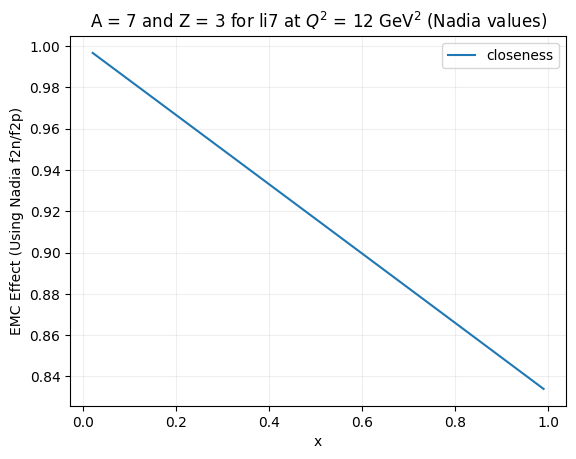

In [43]:
N = 4
Z = 3
nyat = N / Z # न्यूट्रोनियत
qs = 12
fpclose = (nadia_Ppn * N) + (nadia_Ppp * Z) / 10
fnclose = (nadia_Ppn * N) + (nadia_Pnn * Z) / 10
nprat = []
print(f"Nadia values {nadia_Ppn}, {nadia_Ppp}, {nadia_Pnn}")
x = np.linspace(0.02, 0.99, 10)
nadia_remc = np.zeros(len(x))
for i in range(len(x)):
    # remc[i] = (Z * (1 - fpclose * x[i]) + N * nadia_nprat(x[i], qs) * (1 - fnclose * x[i])) / (Z + N * nadia_nprat(x[i], qs))
    num = (1 - fpclose * x[i]) + nyat * nadia_nprat(x[i], qs) * (1 - fnclose * x[i])
    den = 1 + nyat * nadia_nprat(x[i], qs)
    nadia_remc[i] = num / den
    nprat.append(nadia_nprat(x[i], qs))
    print(f'{nadia_remc[i]} {nadia_nprat(x[i], qs)}')
plt.plot(x, nadia_remc, label = 'closeness')
plt.xlabel('x')
plt.ylabel('EMC Effect (Using Nadia f2n/f2p)')
plt.title(fr'A = {Z + N} and Z = {Z} for {target} at $Q^2$ = {qs} GeV$^2$ (Nadia values)')
plt.grid(alpha = 0.2)
plt.legend()
# print(f"{remc[0]:.4f}")
# plt.savefig(f'plots/{target}_emc_{time.time():.0f}.pdf')

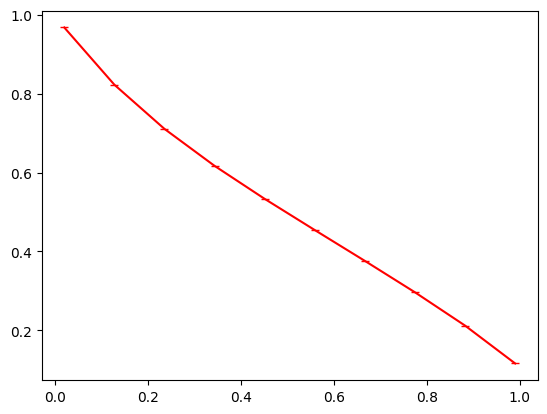

In [44]:
plt.plot(x, nprat, marker = '_', color = 'red')

<h3 style="text-align: center; color: lightcyan"> Abhyuday's calculation </h3>

My values 0.03289146910725189, 0.01825337507326003, 0.016866800453049342


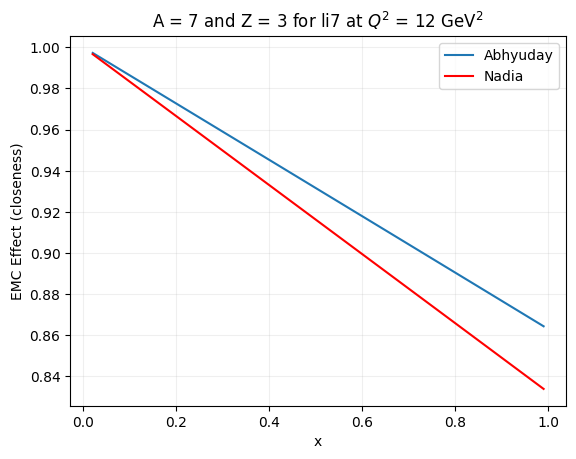

In [45]:
fpclose = (P_pn * N) + (P_pp * Z) / 10
fnclose = (P_pn * N) + (P_nn * Z) / 10
print(f"My values {P_pn}, {P_pp}, {P_nn}")
x = np.linspace(0.02, 0.99, 10)
remc = np.zeros(len(x))
for i in range(len(x)):
    remc[i] = (Z * (1 - fpclose * x[i]) + N * nadia_nprat(x[i], qs) * (1 - fnclose * x[i])) / (Z + N * nadia_nprat(x[i], qs))
    # print(f'{remc[i]} {nadia_nprat(x[i], qs)}')
plt.plot(x, remc, label = 'Abhyuday')
plt.plot(x, nadia_remc, label = 'Nadia', color = 'red')
plt.xlabel('x')
plt.ylabel('EMC Effect (closeness)')
plt.title(fr'A = {Z + N} and Z = {Z} for {target} at $Q^2$ = {qs} GeV$^2$')
plt.grid(alpha = 0.2)
plt.legend()
plt.savefig(f'plots/{target}_emc_{time.time():.0f}.pdf')